# Import

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
# tf.compat.v1.disable_v2_behavior()

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, LeakyReLU, Lambda
from tensorflow.keras.layers import Masking
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical, plot_model

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.regularizers import l1,l2
from tensorflow.keras.regularizers import L2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# !ls "/content/drive/My Drive/ML"
# configurations
data_DIR = '/content/drive/My Drive/Colab Notebooks/1092ML-FinalProject'

Mounted at /content/drive


# Datasets

In [ ]:
# df_adult=pd.read_csv('/content/drive/My Drive/Colab Notebooks/1092ML-FinalProject/df7(expand)-adult-0619.csv', index_col=False)
# df_eld=pd.read_csv('/content/drive/My Drive/Colab Notebooks/1092ML-FinalProject/df7(expand)-elderly-0619.csv', index_col=False)
df_all=pd.read_csv('/content/drive/My Drive/Colab Notebooks/1092ML-FinalProject/df(expand)-all-0619.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
def check_null(dataset):
  print(dataset.isnull().sum())

check_null(df_all_pair)

Unnamed: 0        0
HADM_ID           0
C                 0
TIMER             0
INPUT             0
INPUT_HRS         0
INSULINTYPE       0
EVENT             0
GLC               0
GLCSOURCE         0
ADMISSION_TYPE    0
GENDER            0
age_group         0
DM                0
RULE              0
Repeated          0
LOS_ICU_days      0
days_output       0
dtype: int64


## Input - Adult&Elderly

### cat w/o binary

In [ ]:
df_all_pair.RULE.value_counts()

0.0    2572916
Name: RULE, dtype: int64

In [ ]:
# input (dummy without binary var)
# https://machinelearningmastery.com/how-to-prepare-categorical-data-for-deep-learning-in-python/
def create_input(dataset):
    cols_toscale = ['INPUT', 'INPUT_HRS', 'GLC'] #numerical
    cols_todum=['INSULINTYPE','EVENT', 'RULE'] #categorical
    cols=['GLCSOURCE', 'ADMISSION_TYPE', 'GENDER', 'DM', 'age_group', 'Repeated'] #binary

    input_scale = dataset[cols_toscale]
    scaler = MinMaxScaler(copy=False) 
    input_scale = scaler.fit_transform(input_scale)
    print(input_scale.shape)

    input_dum1 = pd.get_dummies(dataset.loc[:,'INSULINTYPE'],drop_first=True).values
    input_dum2 = pd.get_dummies(dataset.loc[:,'EVENT'],drop_first=True).values
    input_dum3 = pd.get_dummies(dataset.loc[:,'RULE'],drop_first=True).values
    arr0 = np.concatenate((input_dum1, input_dum2, input_dum3), axis=1)
    print(arr0.shape)

    input_cols = dataset[cols].values

    arr = np.concatenate((input_scale, arr0, input_cols), axis=1)
    arr = arr.reshape(-1,dataset['C'].max()+1, arr.shape[1])
    print(arr.shape)
    print(arr[0].shape)
    return arr

df_input = create_input(df_all)

(12813104, 3)
(12813104, 8)
(11084, 1156, 17)
(1156, 17)


In [ ]:
# input (dummy without binary var)- no pair
# https://machinelearningmastery.com/how-to-prepare-categorical-data-for-deep-learning-in-python/
def create_input(dataset):
    cols_toscale = ['INPUT', 'INPUT_HRS', 'GLC'] #numerical
    cols_todum=['INSULINTYPE','EVENT'] #categorical
    cols=['GLCSOURCE', 'ADMISSION_TYPE', 'GENDER', 'DM', 'age_group'] #binary

    input_scale = dataset[cols_toscale]
    scaler = MinMaxScaler(copy=False) 
    input_scale = scaler.fit_transform(input_scale)
    print(input_scale.shape)

    input_dum1 = pd.get_dummies(dataset.loc[:,'INSULINTYPE'],drop_first=True).values
    input_dum2 = pd.get_dummies(dataset.loc[:,'EVENT'],drop_first=True).values
    arr0 = np.concatenate((input_dum1, input_dum2), axis=1)
    print(arr0.shape)

    input_cols = dataset[cols].values

    arr = np.concatenate((input_scale, arr0, input_cols), axis=1)
    arr = arr.reshape(-1,dataset['C'].max()+1, arr.shape[1])
    print(arr.shape)
    print(arr[0].shape)
    return arr

df_input = create_input(df_all)

(12813104, 3)
(12813104, 4)
(11084, 1156, 12)
(1156, 12)


In [ ]:
# input (dummy without binary var)- only significant
# 'INPUT','INPUT_HRS', 'EVENT', 'GLC', 'ADMISSION_TYPE', 'age_group'
# https://machinelearningmastery.com/how-to-prepare-categorical-data-for-deep-learning-in-python/
def create_input(dataset):
    cols_toscale = ['INPUT', 'INPUT_HRS', 'GLC'] #numerical
    cols_todum=['EVENT', 'RULE'] #categorical
    cols=['ADMISSION_TYPE', 'GLCSOURCE', 'Repeated'] #binary

    input_scale = dataset[cols_toscale]
    scaler = MinMaxScaler(copy=False) 
    input_scale = scaler.fit_transform(input_scale)
    print(input_scale.shape)

    input_dum2 = pd.get_dummies(dataset.loc[:,'EVENT'],drop_first=True).values
    input_dum3 = pd.get_dummies(dataset.loc[:,'RULE'],drop_first=True).values
    arr0 = np.concatenate((input_dum2, input_dum3), axis=1)
    print(arr0.shape)

    input_cols = dataset[cols].values

    arr = np.concatenate((input_scale, arr0, input_cols), axis=1)
    arr = arr.reshape(-1,dataset['C'].max()+1, arr.shape[1])
    print(arr.shape)
    print(arr[0].shape)
    return arr

df_input = create_input(df_all)

(12813104, 3)
(12813104, 6)
(11084, 1156, 12)
(1156, 12)


### all continuous

In [ ]:
# input (all as ordinal)
def create_input(dataset):
    cols = ['INPUT','INPUT_HRS', 'INSULINTYPE', 'EVENT', 'GLC', 'GLCSOURCE', 'ADMISSION_TYPE', 'Repeated', 'RULE', 'GENDER', 'DM', 'age_group'] 
    Pair_input_ = dataset[cols]
    Pair_input_ = Pair_input_.values
    print("original input", Pair_input_[:1])
    scaler = MinMaxScaler(copy=False) 
    Pair_input_ = scaler.fit_transform(Pair_input_)
    print("after scaling", Pair_input_[:1])
    Pair_input_ = Pair_input_.reshape(int(dataset.HADM_ID.nunique()),dataset['C'].max()+1, len(cols))
    print("after reshape - input shape: ", Pair_input_.shape)
    return Pair_input_
df_input = create_input(df_all)

original input [[  0.41666668   5.00000016   0.           2.         261.
    0.           1.           0.           0.           0.
    1.           1.        ]]
after scaling [[0.00231481 0.1677171  0.         1.         0.27531646 0.
  1.         0.         0.         0.         1.         0.5       ]]
after reshape - input shape:  (11084, 1156, 12)


In [ ]:
# input (all as ordinal) - only significant
def create_input(dataset):
    cols = ['INPUT','INPUT_HRS', 'EVENT', 'GLC', 'ADMISSION_TYPE', 'age_group'] 
    Pair_input_ = dataset[cols]
    Pair_input_ = Pair_input_.values
    print("original input", Pair_input_[:1])
    scaler = MinMaxScaler(copy=False) 
    Pair_input_ = scaler.fit_transform(Pair_input_)
    print("after scaling", Pair_input_[:1])
    Pair_input_ = Pair_input_.reshape(int(dataset.HADM_ID.nunique()),dataset['C'].max()+1, len(cols))
    print("after reshape - input shape: ", Pair_input_.shape)
    return Pair_input_
df_input = create_input(df_rep_expand)

original input [[ 19.77932088   8.9906004    2.         170.           1.
    1.        ]]
after scaling [[0.10988512 0.30157547 1.         0.18867925 1.         0.5       ]]
after reshape - input shape:  (10676, 241, 6)


## Input (adult and elderly separately)

### cat w/o binary

In [ ]:
# input (dummy without binary var)
# https://machinelearningmastery.com/how-to-prepare-categorical-data-for-deep-learning-in-python/
def create_input(dataset):
    cols_toscale = ['INPUT', 'INPUT_HRS', 'GLC'] #numerical
    cols_todum=['INSULINTYPE','EVENT', 'RULE'] #categorical
    cols=['GLCSOURCE', 'ADMISSION_TYPE', 'GENDER', 'DM', 'Repeated'] #binary

    input_scale = dataset[cols_toscale]
    scaler = MinMaxScaler(copy=False) 
    input_scale = scaler.fit_transform(input_scale)
    print(input_scale.shape)

    input_dum1 = pd.get_dummies(dataset.loc[:,'INSULINTYPE'],drop_first=True).values
    input_dum2 = pd.get_dummies(dataset.loc[:,'EVENT'],drop_first=True).values
    arr0 = np.concatenate((input_dum1, input_dum2), axis=1)
    print(arr0.shape)

    input_cols = dataset[cols].values

    arr = np.concatenate((input_scale, arr0, input_cols), axis=1)
    arr = arr.reshape(-1,dataset['C'].max()+1, arr.shape[1])
    print(arr.shape)
    print(arr[0].shape)
    return arr

df_input = create_input(df_eld)

(5035734, 3)
(5035734, 4)
(5742, 877, 12)
(877, 12)


## Output

In [ ]:
# output
def create_output(dataset):
  output_ = dataset.groupby(by=["HADM_ID"]).days_output.max()
  output_ = to_categorical(output_, num_classes=2)
  print(output_.shape)
  return output_

df_output = create_output(df_all)

(11084, 2)


In [ ]:
x=df_adult_pair.groupby(by=["HADM_ID"]).days_output.max()
x.value_counts()

0    3180
1    1950
Name: days_output, dtype: int64

# train test split

In [ ]:
## split the data
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely
x_train, x_test, y_train, y_test = train_test_split(df_input, df_output, test_size=1 - train_ratio, random_state=42, shuffle=True, stratify=df_output)
# test is now 10% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio), random_state=42, shuffle=True, stratify=y_test) 
print(x_train.shape, x_val.shape, x_test.shape)

(8313, 1156, 17) (1662, 1156, 17) (1109, 1156, 17)


In [ ]:
y_test

,grp
0,0
1,0
2,0
3,0
4,1
...,...
1104,0
1105,1
1106,0
1107,0


# Model

##  model1

In [ ]:
# Model1
# Masking layer only mask timesteps where all features are 0, so the above 20 timesteps are not masked because none of them are completely 0.
#kernel_regularizer=tf.keras.regularizers.L2(0.01)

model = Sequential()
model.add(Masking(mask_value=0., input_shape=x_train[0].shape))
model.add(LSTM(units = 16, return_sequences = True, kernel_regularizer=L2(0.05))) #, kernel_regularizer=l2(0.01)
model.add(LSTM(units = 8, return_sequences = True))
model.add(LSTM(units = 2))

# Adding the output layer
# For Full connection layer we use dense
model.add(Dense(units=2, activation='sigmoid')) # activation = ‘softmax’ should be used for multiclass classification whereas ’sigmoid’ for binary classification. 
print(model.summary())

opt = tf.keras.optimizers.Adam(learning_rate=0.001) #momentum=0.1
model.compile(
    optimizer=opt,
    loss='categorical_crossentropy', #categorical_crossentropy, binary_crossentropy, sparse_categorical_crossentropy
    metrics=['accuracy']
       )

train_history = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=128, epochs=50, verbose=1) 

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_4 (Masking)          (None, 1156, 12)          0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 1156, 16)          1856      
_________________________________________________________________
lstm_13 (LSTM)               (None, 1156, 8)           800       
_________________________________________________________________
lstm_14 (LSTM)               (None, 2)                 88        
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 6         
Total params: 2,750
Trainable params: 2,750
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
65/65 [==============================] - 16s 120ms/step - loss: 1.3438 - accuracy: 0.7354 - val_loss: 

## model2

In [ ]:
# Model2
# Masking layer only mask timesteps where all features are 0, so the above 20 timesteps are not masked because none of them are completely 0.
#kernel_regularizer=tf.keras.regularizers.L2(0.01)

model = Sequential()
model.add(Masking(mask_value=0., input_shape=x_train[0].shape))
model.add(LSTM(units = 8, return_sequences = True, kernel_regularizer=L2(0.05))) 
model.add(LSTM(units = 4, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 2))

# Adding the output layer
# For Full connection layer we use dense
model.add(Dense(units=2, activation='sigmoid')) # activation = ‘softmax’ should be used for multiclass classification whereas ’sigmoid’ for binary classification. 
print(model.summary())

opt = tf.keras.optimizers.Adam(learning_rate=0.001) #momentum=0.1
model.compile(
    optimizer=opt,
    loss='categorical_crossentropy', #categorical_crossentropy, binary_crossentropy, sparse_categorical_crossentropy
    metrics=['accuracy']
       )

train_history = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=128, epochs=50, verbose=1)

##model3

In [ ]:
# Model3
# Masking layer only mask timesteps where all features are 0, so the above 20 timesteps are not masked because none of them are completely 0.
#kernel_regularizer=tf.keras.regularizers.L2(0.01)

model = Sequential()
model.add(Masking(mask_value=0., input_shape=x_train[0].shape))
model.add(LSTM(units = 8, return_sequences = True, kernel_regularizer=L2(0.05))) 
model.add(Dropout(0.1))
model.add(LSTM(units = 4, return_sequences = True, kernel_regularizer=L2(0.05)))
model.add(Dropout(0.1))
model.add(LSTM(units = 2))

# Adding the output layer
# For Full connection layer we use dense
model.add(Dense(units=2, activation='sigmoid')) # activation = ‘softmax’ should be used for multiclass classification whereas ’sigmoid’ for binary classification. 
print(model.summary())

opt = tf.keras.optimizers.Adam(learning_rate=0.001) #momentum=0.1
model.compile(
    optimizer=opt,
    loss='categorical_crossentropy', #categorical_crossentropy, binary_crossentropy, sparse_categorical_crossentropy
    metrics=['accuracy']
       )

# valid_step=len(x_val/104)
train_history = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=64, epochs=50, verbose=1) 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_1 (Masking)          (None, 1156, 17)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 1156, 8)           832       
_________________________________________________________________
dropout_1 (Dropout)          (None, 1156, 8)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 1156, 4)           208       
_________________________________________________________________
dropout_2 (Dropout)          (None, 1156, 4)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 2)                 56        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                

### model performance

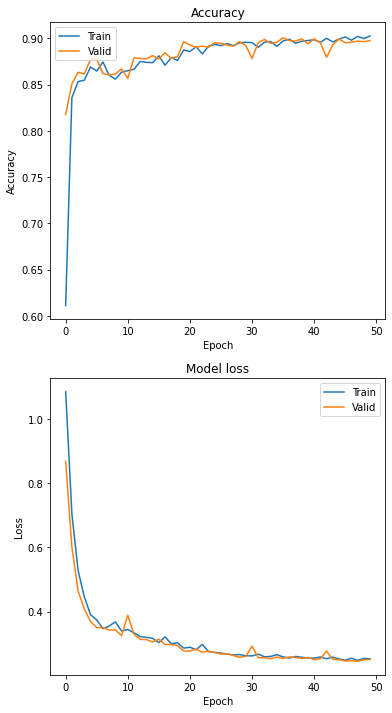

In [ ]:
#@title Learning curve
# Training history visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6,12))

# Plot training & validation accuracy values
ax1.plot(train_history.history['accuracy'])
ax1.plot(train_history.history['val_accuracy'])
ax1.set_title('Accuracy')
ax1.set(ylabel='Accuracy', xlabel='Epoch')
ax1.legend(['Train', 'Valid'], loc='upper left')

# Plot training & validation loss values
ax2.plot(train_history.history['loss'])
ax2.plot(train_history.history['val_loss'])
ax2.set_title('Model loss')
ax2.set(ylabel='Loss', xlabel='Epoch')
ax2.legend(['Train', 'Valid'], loc='upper right')

# plt.savefig('train_history.png', dpi=96)  # <-- save plot
plt.show()

### prediction

In [ ]:
pred_label = model.predict(x_test)
# print(y_test[:3])
pred_label_number = np.argmax(pred_label, axis=1)
print()
# print(label_number[:3])

test_labels = np.argmax(y_test, axis=1)
print()

from sklearn.metrics import classification_report
print(classification_report(test_labels, pred_label_number))
# recall of the positive class is also known as “sensitivity”; recall of the negative class is “specificity”



              precision    recall  f1-score   support

           0       0.88      0.95      0.91       350
           1       0.90      0.80      0.85       225

    accuracy                           0.89       575
   macro avg       0.89      0.87      0.88       575
weighted avg       0.89      0.89      0.89       575



In [ ]:
from sklearn.metrics import roc_auc_score
print("AUROC:", roc_auc_score(test_labels, pred_label[:,1]))

AUROC: 0.958552380952381


In [ ]:
y_test = pd.DataFrame(test_labels, columns=['grp']) 
# y_test.head()
y_pred = pd.DataFrame(pred_label[:,1], columns=['prob'] )
# y_pred.head()

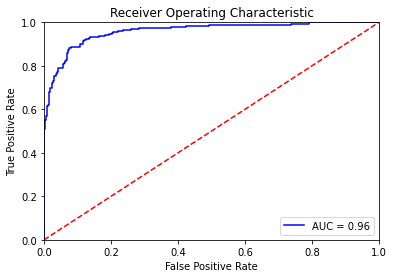

In [ ]:
# plot AUROC (simple, 2 class)

import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()